# Shipment Tracking

## Gathering sense of the data

### Imported Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Train.csv")

### Dataset Preview

In [ ]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Feature and Label description

- **ID:** ID Number of Customers.
- **Warehouse block:** The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- **Mode of shipment:** The Company Ships the products in multiple way such as Ship, Flight and Road.
- **Customer care calls:** The number of calls made from enquiry for enquiry of the shipment.
- **Customer rating:** The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- **Cost of the product:** Cost of the Product in US Dollars.
- **Prior purchases:** The Number of Prior Purchase.
- **Product importance:** The company has categorized the product in the various parameter such as low, medium, high.
- **Gender:** Male and Female.
- **Discount offered:** Discount offered on that specific product.
- **Weight in gms:** It is the weight in grams.
- **Reached on time:** It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [ ]:
df["Reached.on.Time_Y.N"] = np.where(df["Reached.on.Time_Y.N"] == 1, 0, 1)
df.drop(["ID"], axis=1, inplace=True)

Now, 1 Means Reached on time. 0 Means not reached on time

## Checking Null Values

In [ ]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

There are no missing values in the dataset, which is excellent for analysis as it means no imputation is necessary.

## Checking Duplicate Values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


There can be potention outliers in the Numerical columns, We'll try outlier detection and removal techniques as part of next data cleaning step.

## Outlier Detection and Handling

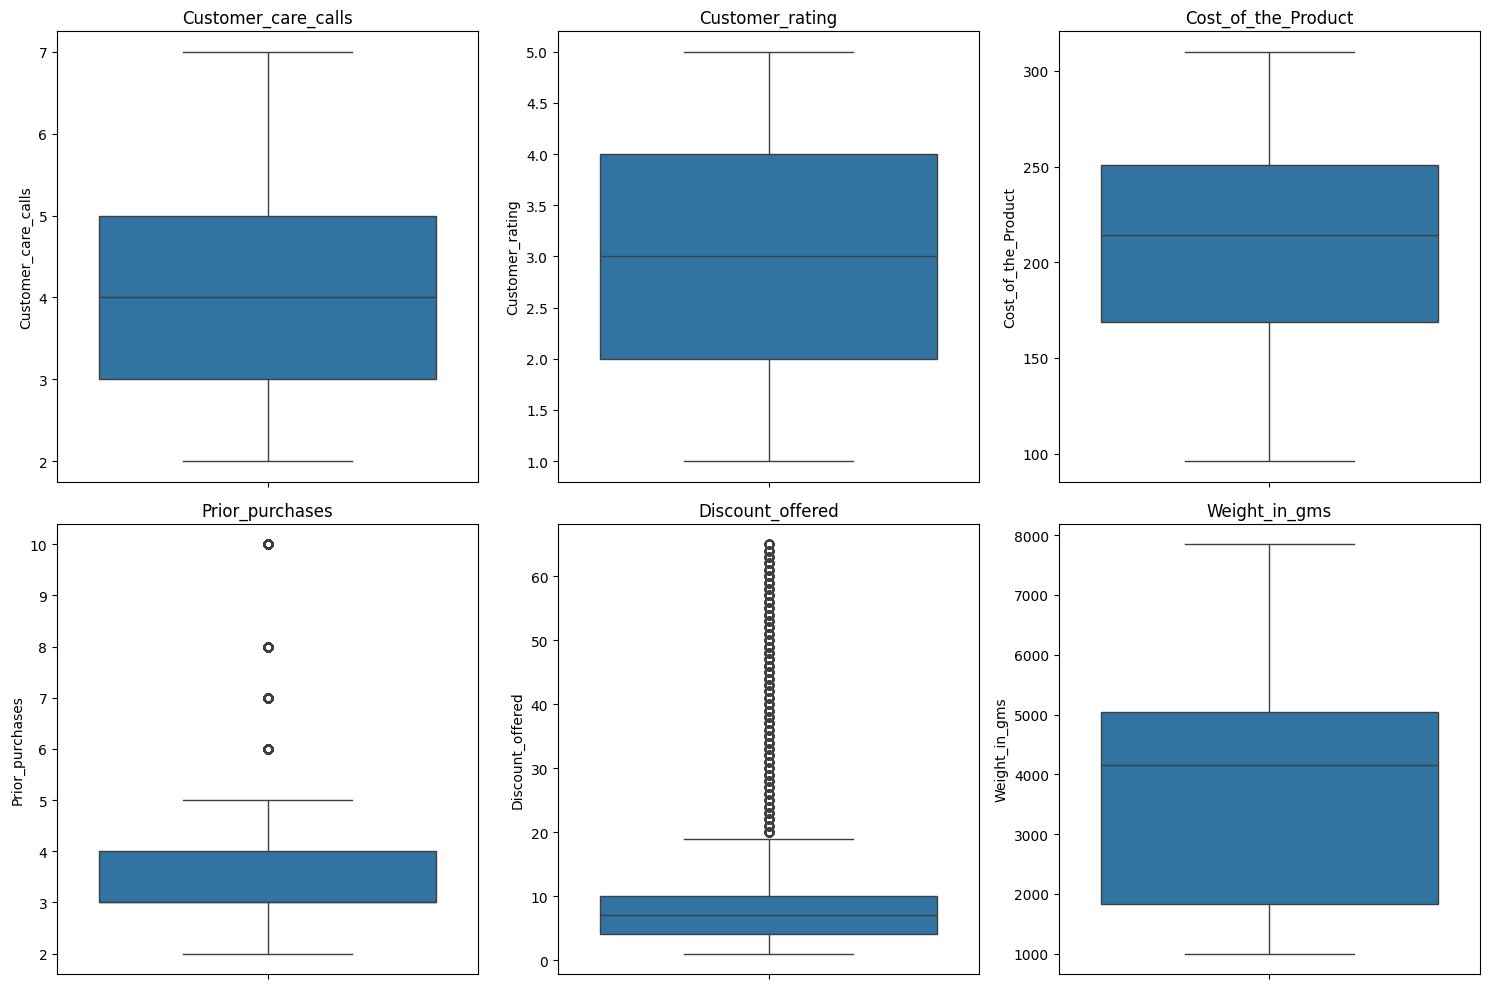

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
ax = ax.flatten()

count = 0
for i in df.drop(["Reached.on.Time_Y.N"], axis=1).select_dtypes("number"):
  sns.boxplot(y = i, data=df, ax=ax[count], ).set_title(i)
  count += 1

fig.tight_layout()
plt.show()

- There are two columns Prior_purchases and Discount_offered has possible outliers.
- We'll use IQR method to detect then outliers.
- As we don't want to remove outliers Instead We'll perform capping.

### Capping

In [ ]:
columns = ["Discount_offered", "Prior_purchases"]

for i in columns:
  q3 = df[i].quantile(0.75)
  q1 = df[i].quantile(0.25)
  IQR = q3 - q1

  upper_limit = q3 + 1.5 * IQR
  lower_limit = q1 - 1.5 * IQR

  df[i] = np.where(df[i] > upper_limit, upper_limit, np.where(df[i] < lower_limit, lower_limit, df[i]))

Cross checking the results

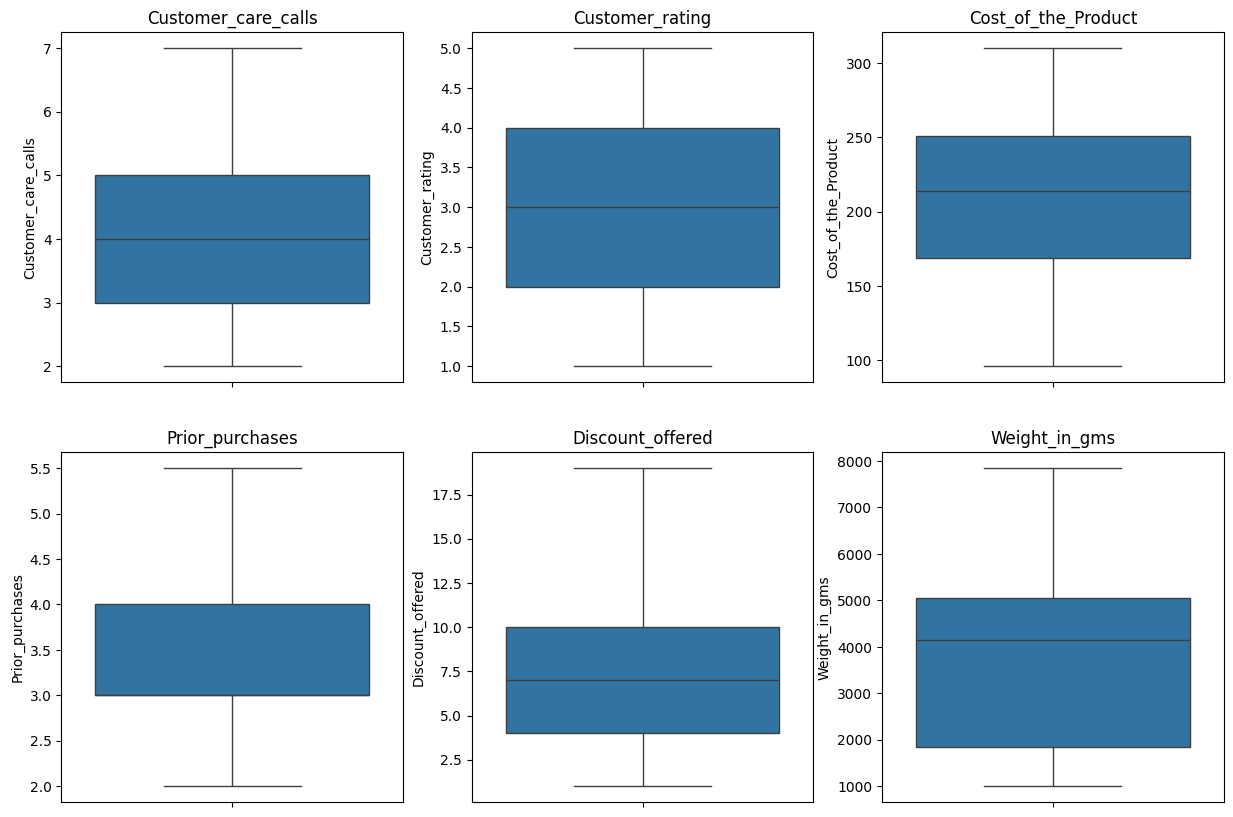

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
ax = ax.flatten()

count = 0
for i in df.drop(["Reached.on.Time_Y.N"], axis=1).select_dtypes("number"):
  sns.boxplot(y = i, data=df, ax=ax[count], ).set_title(i)
  count += 1

Now our data has no outliers

## Statistics of Numeric Columns

In [ ]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.421629,8.590963,3634.016729,0.403309
std,1.141490,1.413603,48.063272,1.136903,6.095461,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,0.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,5.500000,19.000000,7846.000000,1.000000


## Summary

- The dataset contains 10,999 entries.
- Customer care calls range from 2 to 7, with an average of approximately 4 calls per customer.
- Customer ratings are evenly distributed between 1 (lowest) and 5 (highest).
- The cost of the product varies significantly, with a minimum of ```$96``` and a maximum of ```$310```.
- Prior purchases range from 2 to 5, indicating the number of times customers have purchased before.
- Discount offered varies, with a maximum discount of 19%.
- The weight of the products ranges from 1001 grams to 7846 grams.
- Approximately 59.7% of the shipments did not reach on time.

## Distribution of Categorical Columns

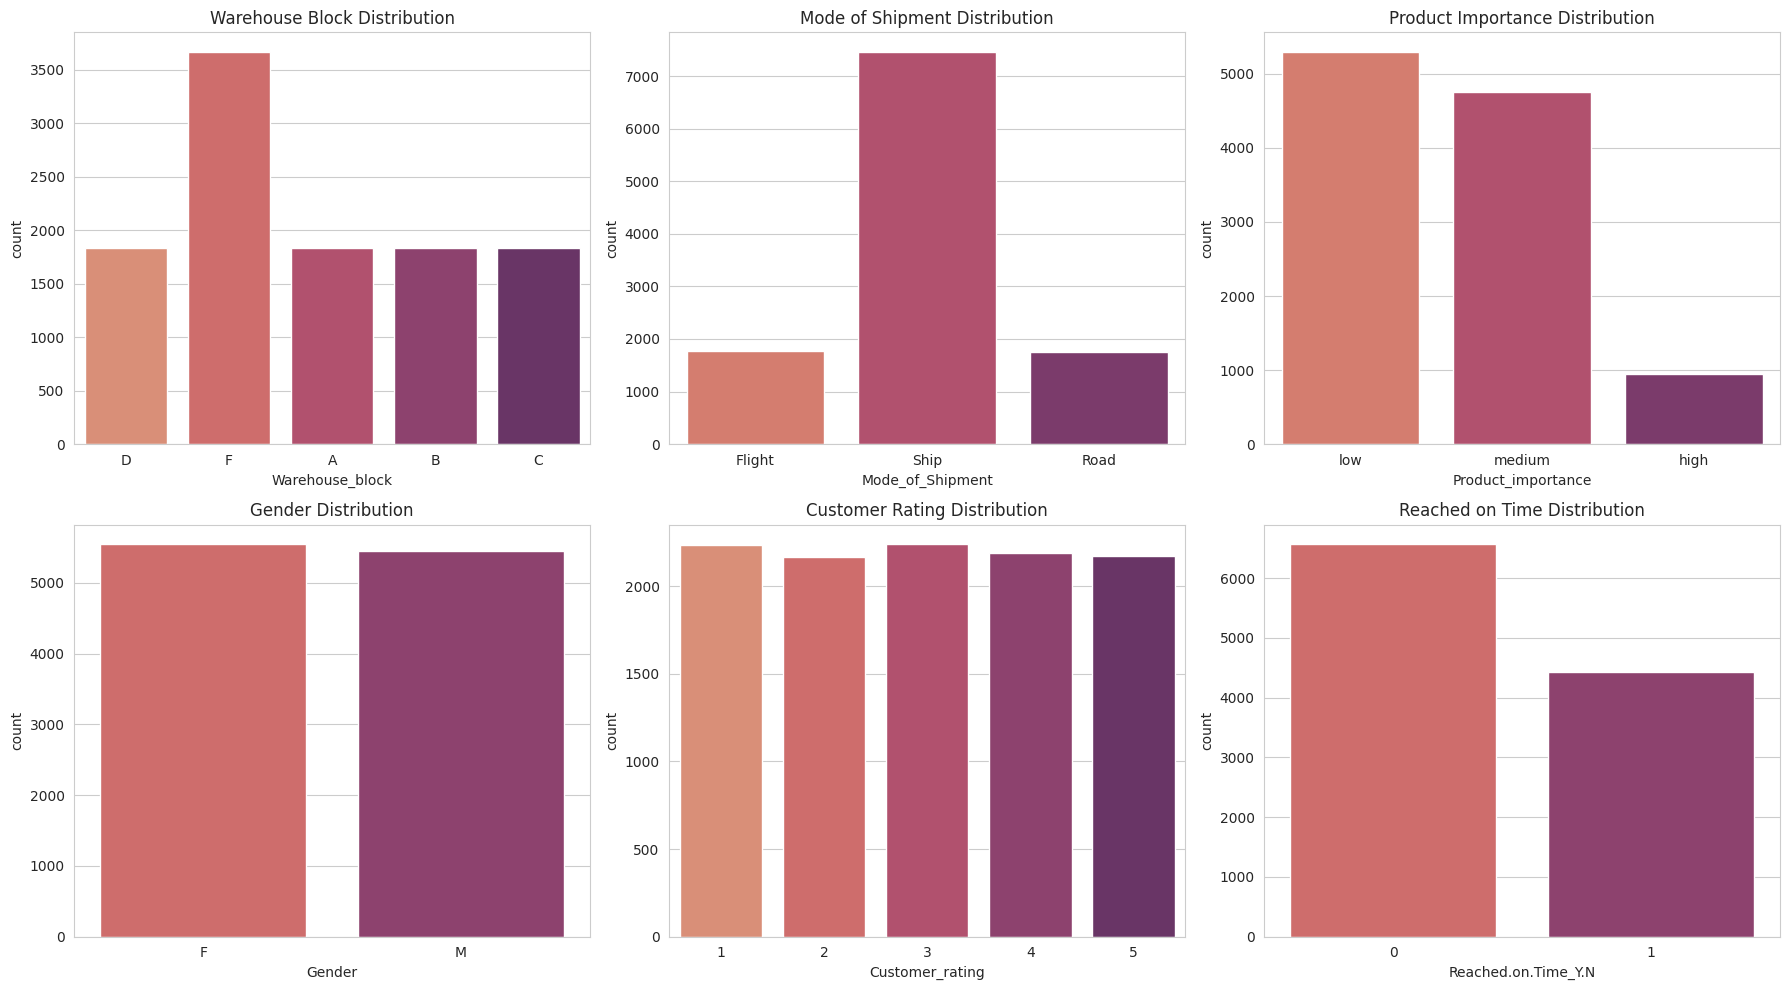

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Distribution of categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

palette = "flare"

# axes = axes.flatten()
sns.countplot(x='Warehouse_block', data=df, ax=axes[0, 0], palette = palette)
axes[0, 0].set_title('Warehouse Block Distribution')

sns.countplot(x='Mode_of_Shipment', data=df, ax=axes[0, 1], palette = palette)
axes[0, 1].set_title('Mode of Shipment Distribution')

sns.countplot(x='Product_importance', data=df, ax=axes[0, 2], palette = palette)
axes[0, 2].set_title('Product Importance Distribution')

sns.countplot(x='Gender', data=df, ax=axes[1, 0], palette = palette)
axes[1, 0].set_title('Gender Distribution')

sns.countplot(x='Customer_rating', data=df, ax=axes[1, 1], palette = palette)
axes[1, 1].set_title('Customer Rating Distribution')

sns.countplot(x='Reached.on.Time_Y.N', data=df, ax=axes[1, 2], palette = palette)
axes[1, 2].set_title('Reached on Time Distribution')

plt.tight_layout()
plt.show()

- **Warehouse Block Distribution:** The products are evenly distributed across the warehouse blocks A to D. Block F has highest frequency.
- **Mode of Shipment Distribution:** Ship is the most common mode of shipment compare to the Flight and Road.
- **Product Importance Distribution:** Most products are categorized as low importance, followed by medium and high.
- **Gender Distribution:** The dataset contains a nearly equal distribution of male and female customers.
- **Customer Rating Distribution:** Customer ratings are evenly distributed from 1 to 5.
- **Reached on Time Distribution:** There's a higher number of shipments that did not reach on time compared to those that did.

### Impact of Product Importance

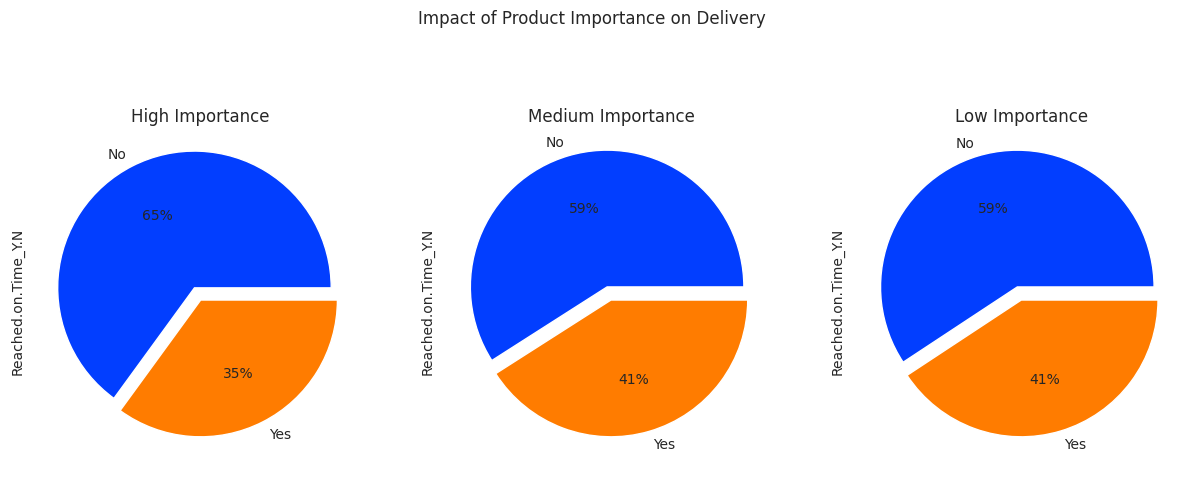

In [ ]:
x = df.groupby(["Product_importance"])["Reached.on.Time_Y.N"].value_counts()

fig, axes = plt.subplots(1, 3, figsize = (15, 6))

palette_color = sns.color_palette('bright')

x["high"].plot(kind='pie', autopct='%.0f%%', colors=palette_color, explode = [0.1, 0], ax = axes[0], labels=["No", "Yes"])
axes[0].set_title('High Importance')

x["medium"].plot(kind='pie', autopct='%.0f%%', colors=palette_color, explode = [0.1, 0], ax = axes[1], labels=["No", "Yes"])
axes[1].set_title('Medium Importance')

x["low"].plot(kind='pie', autopct='%.0f%%', colors=palette_color, explode = [0.1, 0], ax = axes[2], labels=["No", "Yes"])
axes[2].set_title('Low Importance')

fig.suptitle("Impact of Product Importance on Delivery")

plt.show()

This visualization shows that if the product importance is high there is slight
chance that it will not reach on time.

### Customer Rating

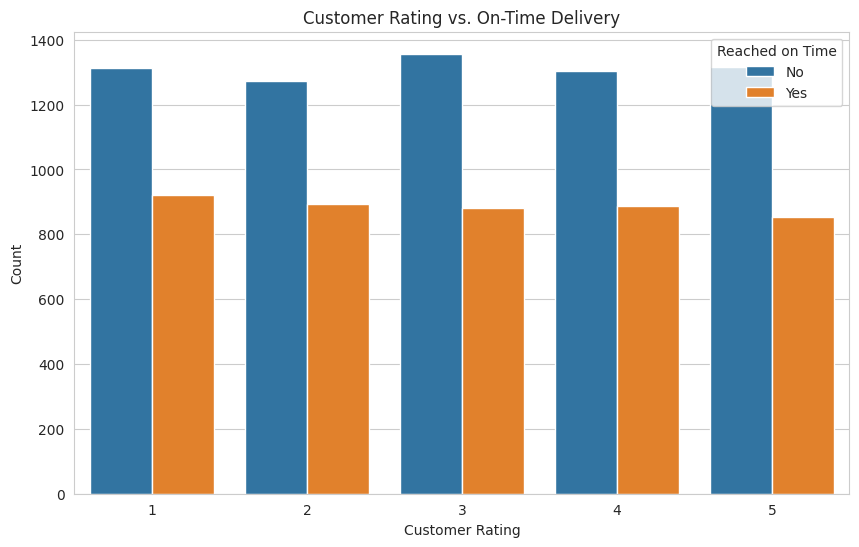

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_rating', hue='Reached.on.Time_Y.N', data=df)
plt.title('Customer Rating vs. On-Time Delivery')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.legend(title='Reached on Time', labels=['No', 'Yes'])
plt.show()

This chart illustrates that the distribution of customer ratings (from 1 to 5) is fairly consistent across both on-time and not on-time deliveries. This suggests that the customer rating may not be directly influenced by whether the product was delivered on time or not. Each rating level shows a similar pattern of distribution between products that were delivered on time and those that were not.

### Impact of Shipment Mode

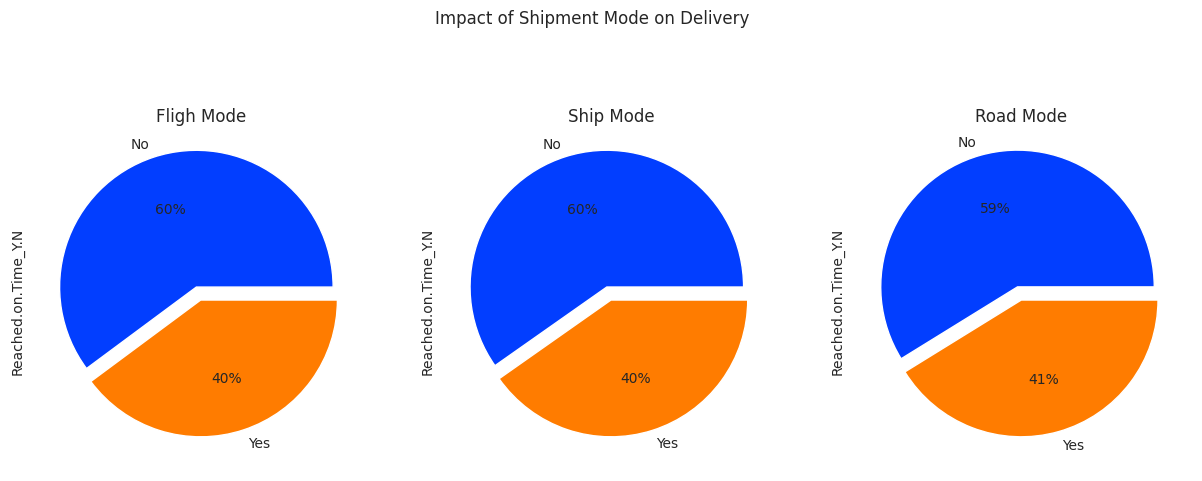

In [ ]:
x = df.groupby(["Mode_of_Shipment"])["Reached.on.Time_Y.N"].value_counts()

fig, axes = plt.subplots(1, 3, figsize = (15, 6))

palette_color = sns.color_palette('bright')

x["Flight"].plot(kind='pie', autopct='%.0f%%', colors=palette_color, explode = [0.1, 0], ax = axes[0], labels=["No", "Yes"])
axes[0].set_title('Fligh Mode')

x["Ship"].plot(kind='pie', autopct='%.0f%%', colors=palette_color, explode = [0.1, 0], ax = axes[1], labels=["No", "Yes"])
axes[1].set_title('Ship Mode')

x["Road"].plot(kind='pie', autopct='%.0f%%', colors=palette_color, explode = [0.1, 0], ax = axes[2], labels=["No", "Yes"])
axes[2].set_title('Road Mode')

fig.suptitle("Impact of Shipment Mode on Delivery")

plt.show()

All shipment modes show similar ratio of Reach on time and Not Reached on time shipments.

### Distribution of Cost

<Axes: xlabel='Cost_of_the_Product', ylabel='Count'>

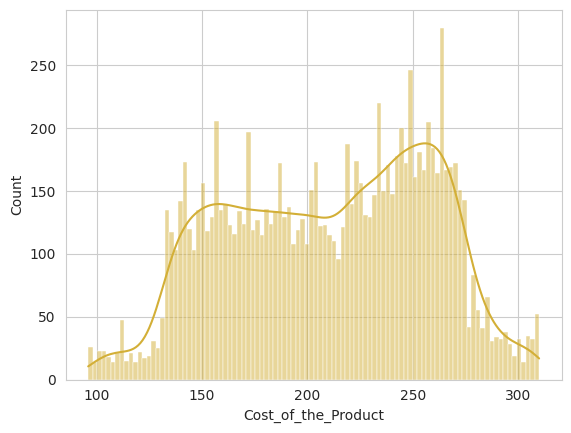

In [ ]:
sns.histplot(data=df, x="Cost_of_the_Product", kde=True, bins=100, color="#d3af37")

### Customer query satisfaction

In [ ]:
relation_data = df.groupby('Customer_care_calls')['Reached.on.Time_Y.N'].value_counts(normalize=True).unstack()
relation_data.columns = ['Not Reached on Time', 'Reached on Time']
relation_data = relation_data.reset_index()

relation_data

,Customer_care_calls,Not Reached on Time,Reached on Time
0,2,0.652038,0.347962
1,3,0.625117,0.374883
2,4,0.597695,0.402305
3,5,0.584192,0.415808
4,6,0.516288,0.483712
5,7,0.516260,0.483740


This table shows that when Customer raises more queries to the customer care, There slight chance that Customer Support will address the issue and delivery will make it on time.

### Scatter plot of Cost and Discount

<Axes: xlabel='Discount_offered', ylabel='Cost_of_the_Product'>

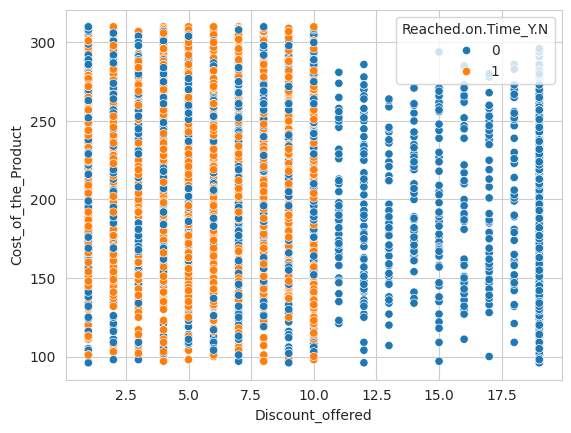

In [ ]:
sns.scatterplot(x="Discount_offered", y="Cost_of_the_Product",data=df, hue="Reached.on.Time_Y.N")

As per the visualization It is clear that products with heavy discount (10%++) more likely to Not reach on time.

### Cost vs Customer Care Calls

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

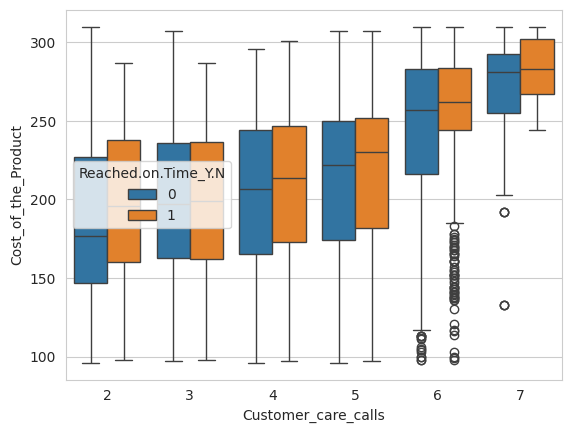

In [ ]:
sns.boxplot(x="Customer_care_calls", y="Cost_of_the_Product", data=df, hue="Reached.on.Time_Y.N")

We can see that number of customer calls are increasing if the Cost of the Product is high.

### Correlation Matrix

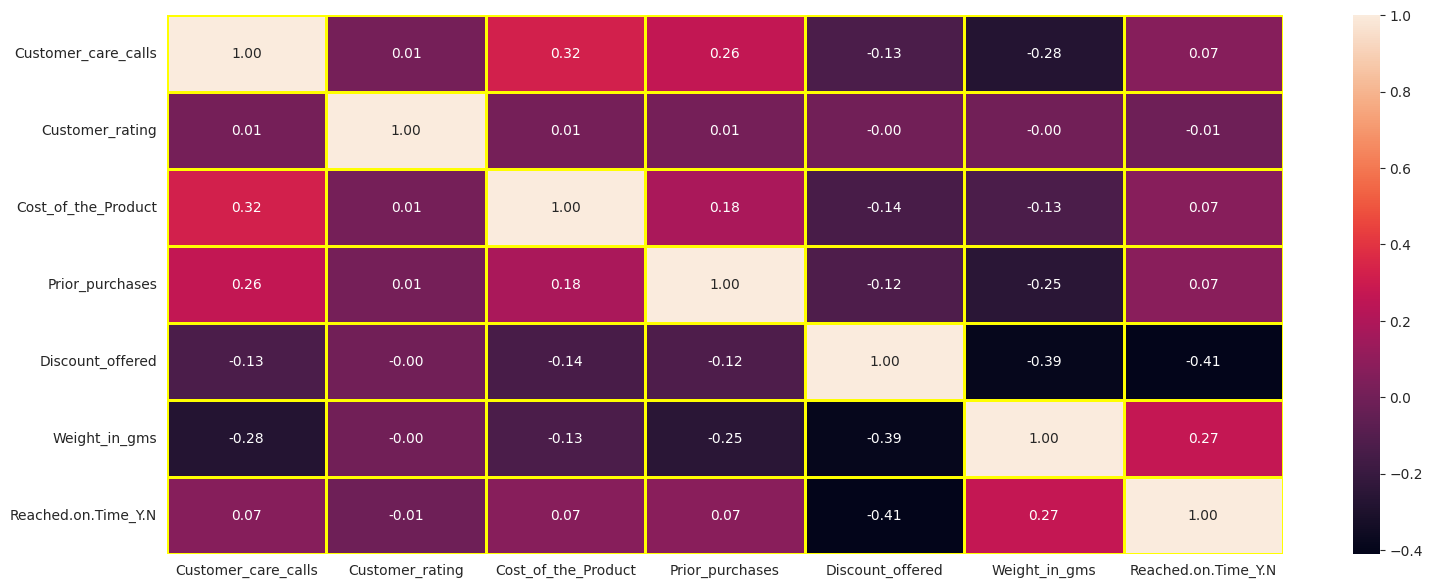

In [ ]:
plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', linewidth = 1, linecolor = 'yellow')
plt.show()

Conclusions from Correlation matrix :-

- Discount Offered have high negative correlation with Reached on Time 40%.
- Weights in gram have positive correlation with Reached on Time 27%.
- Discount Offered and weights in grams have negative correlation 38%.
- Customer care calls and weights in grams havenegative correlation 28%.
- Customer care calls and cost of the product have positive correlation of 32%.
- Prior Purchases and Customer care calls have slightly positive correlation.

# Feature Engineering & Modeling

## One Hot Encoding of Categorical Columns

In [ ]:
cat_cols = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"]
df_ = pd.concat((df,pd.get_dummies(df[cat_cols], drop_first=True)), axis=1)
df_.drop(cat_cols, axis=1, inplace=True)

In [ ]:
df_.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3.0,19.0,1233,0,0,0,1,0,0,0,1,0,0
1,4,5,216,2.0,19.0,3088,0,0,0,0,1,0,0,1,0,1
2,2,2,183,4.0,19.0,3374,0,0,0,0,0,0,0,1,0,1
3,3,3,176,4.0,10.0,1177,0,1,0,0,0,0,0,0,1,1
4,2,2,184,3.0,19.0,2484,0,0,1,0,0,0,0,0,1,0


## Feature Construction

In [ ]:
# Overall Inteaction
df_["Over All Interaction"] = df_["Customer_care_calls"] * df_["Customer_rating"]

# Cost per Gram
df_["Cost Per Unit"] = df_["Cost_of_the_Product"] / df["Weight_in_gms"]


### Separation of features and label

In [ ]:
X = df_.drop(["Reached.on.Time_Y.N"], axis=1)
y = df_["Reached.on.Time_Y.N"]

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.2)

### Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rbs = RobustScaler()

X_train = rbs.fit_transform(X_train)
X_test = rbs.transform(X_test)

### Power Transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

## Model Training

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

#### SVM Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

#### XGBoost Classifier

In [ ]:
import xgboost as xgb_

xgb = xgb_.XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [ ]:
# Metrics

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

In [ ]:
models = {
    "Logistic Regression": lr,
    "SVM": svc,
    "Random Forest": rf,
    "XGBoost": xgb
}

for i in models.keys():
  print(f'Model : {i}\n')
  model = models[i]
  y_pred = model.predict(X_test)
  print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
  print(f'ROC-AUC  : {roc_auc_score(y_test, y_pred)}')
  print(f'F1 Score : {f1_score(y_test, y_pred)}\n')
  print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
  print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n')
  print("*"*70)

Model : Logistic Regression

Accuracy : 0.6445454545454545
ROC-AUC  : 0.6218024047226023
F1 Score : 0.5334128878281623

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1322
           1       0.56      0.51      0.53       878

    accuracy                           0.64      2200
   macro avg       0.63      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200

Confusion Matrix: 
[[971 351]
 [431 447]]

**********************************************************************
Model : SVM

Accuracy : 0.6568181818181819
ROC-AUC  : 0.6758130326453671
F1 Score : 0.6416706217370669

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1322
           1       0.55      0.77      0.64       878

    accuracy                           0.66      2200
   macro avg       0.67      0.68      0.66      2200
weighted avg   

In [ ]:
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = []
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb_.XGBClassifier(eta = lr)
    xgb_classifier.fit(X_train, y_train)
    train_XG.append(xgb_classifier.score(X_train, y_train))
    test_XG.append(xgb_classifier.score(X_test, y_test))

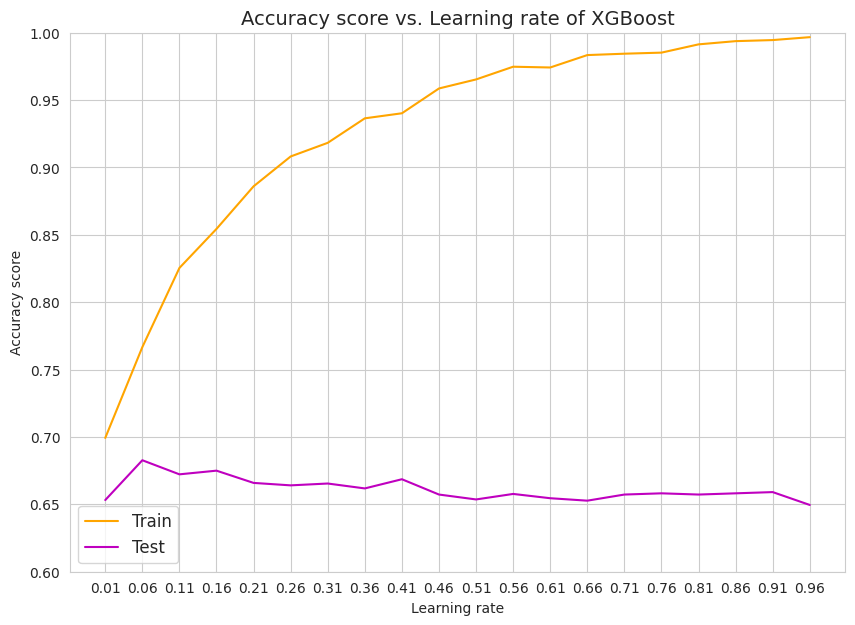

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)

plt.show()

### Hyper Parameter Tuning

In [ ]:
from sklearn.metrics import make_scorer

# ROC AUC Scorer
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)

# Define hyperparameters to tune
params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb, param_grid=params,
                           scoring=roc_auc_scorer, cv=5,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC_AUC found: ", grid_search.best_score_)

# Evaluate the model on test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Accuracy on test set: ", test_accuracy)

Best parameters found:  {'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 1.0}
Best ROC_AUC found:  0.7539247770661708
Accuracy on test set:  0.6868181818181818


In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(best_model, X_train, y_train, cv=5, scoring=roc_auc_scorer))

0.7539247770661708

Based on the analysis and findings from the capstone project, several conclusions can be drawn:

1. **Customer Interaction and Satisfaction:**
The number of customer care calls seems to increase with the cost of the product, indicating that customers may have higher expectations and demand better service for higher-priced items. This suggests that the company should focus on improving customer service channels and responsiveness to inquiries, especially for more expensive products.

2. **Impact of Discounts on Timeliness:**
Products with heavy discounts are more likely to not reach on time. This could imply that logistics and fulfillment operations may need to be optimized to handle high-demand periods, especially during discount seasons or sales events. Offering discounts while maintaining delivery efficiency could enhance customer satisfaction and loyalty.

3. **Product Importance and Timeliness:**
There's a slight indication that high-importance products may have a lower likelihood of reaching on time. This warrants further investigation into the logistics and handling processes for high-priority items to ensure timely delivery. Strengthening supply chain management practices for such products could help mitigate delays and improve overall service reliability.

4. **Correlation Insights:**
The correlation matrix reveals valuable insights into the relationships between various features and the target variable (reached on time). For instance, the positive correlation between customer care calls and the cost of the product suggests that higher-priced items may require more support or attention from customer service teams.

5. **Machine Learning Model Performance:**
The machine learning model achieved a respectable ROC AUC score of 75%, indicating its ability to effectively classify whether a product will reach on time or not. While the model performs reasonably well, continuous monitoring and refinement are necessary to adapt to changing business dynamics and evolving customer needs.

Based on these conclusions, here are some suggestions for the company:

1. **Optimize Logistics and Fulfillment Processes:**
Invest in improving warehouse management systems, shipment tracking technologies, and delivery networks to enhance efficiency and accuracy in product delivery.

2. **Enhance Customer Communication Channels:**
Strengthen customer care infrastructure and empower support teams with tools and resources to address inquiries and resolve issues promptly. Implement proactive communication strategies to keep customers informed about shipment status and potential delays.

3. **Segmentation and Prioritization:**
Segment products based on importance, demand, and delivery requirements to prioritize resources and attention accordingly. Allocate resources strategically to ensure timely delivery of high-priority items while maintaining service standards for all products.

4. **Data-Driven Decision Making:**
Continue leveraging data analytics and machine learning techniques to gain actionable insights into customer behavior, market trends, and operational performance. Foster a culture of data-driven decision-making to drive continuous improvement and innovation across the organization.

By implementing these recommendations and leveraging the insights gained from the capstone project, the company can strengthen its competitive position, enhance customer satisfaction, and drive sustainable growth in the dynamic e-commerce landscape.